In [1]:
from xraycam.nbinit import *
camcontrol.set_detector('zwo')
from xraycam.camalysis import *

Process Process-2:
Traceback (most recent call last):
  File "/home/xrayslaptippitytop/.local/lib/python3.5/site-packages/multiprocess-0.70.4-py3.5-linux-x86_64.egg/multiprocess/process.py", line 254, in _bootstrap
    self.run()
  File "/home/xrayslaptippitytop/.local/lib/python3.5/site-packages/multiprocess-0.70.4-py3.5-linux-x86_64.egg/multiprocess/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "zmq/backend/cython/checkrc.pxd", line 25, in zmq.backend.cython.checkrc._check_rc (zmq/backend/cython/socket.c:7535)
  File "/home/xrayslaptippitytop/.local/lib/python3.5/site-packages/xraycam-0.0.0-py3.5.egg/xraycam/zwo.py", line 85, in sink_process
    zmq_comm.start_sink_routine(sink_function)
  File "/home/xrayslaptippitytop/.local/lib/python3.5/site-packages/xraycam-0.0.0-py3.5.egg/xraycam/zmq_comm.py", line 82, in start_sink_routine
    receiver.bind(sink_addr)
  File "zmq/backend/cython/socket.pyx", line 487, in zmq.backend.cython.socket.Socket.bind 

In [2]:
class Monitor:
    def __init__(self, *args, transpose = True, vmax = 150, rebin = 1, **kwargs):
        self.run = camcontrol.DataRun(*args, **kwargs)
        self.vmax = vmax
        self.rebin = rebin

    def frame(self):
        return self.run.get_frame()
    
    def update(self):
        self.run.show(vmax = self.vmax)
        self.run.plot_lineout(rebin = self.rebin)
        self.frame().plot_histogram(xmin = 0, xmax = self.vmax)
        
    def stop(self):
        self.run.stop()

## Code specific to ALS

In [3]:
from xraycam.camcontrol import _rebin_spectrum

In [4]:
def rebin_spc(arr2d,rebin=5):
    lineout = np.sum(arr2d,axis=0)/110
    return _rebin_spectrum(np.array(range(len(lineout))),lineout,rebin)[1]

In [5]:
def _reorient_array(arr2d):
    """Take output from the get_array() method for dataruns from the new camera,
    and reorient them to match what our usual analysis code expects."""
    return np.transpose(arr2d[::,::-1])

In [6]:
def plot_with_energy_scale_arr2d(arr2d,known_energy,photon_value=110,yrange=[0,-1],xrange=[0,-1],rebin=1,show=True,peaknormalize=False, label=None,calcfwhm=False,parabolic=False,**kwargs):
    if parabolic == False:
        lineout = np.sum(arr2d[yrange[0]:yrange[1],xrange[0]:xrange[1]],axis=0)/photon_value
    else:
        lineout = get_parabolic_lineout(arr2d,yrange=yrange)[xrange[0]:xrange[1]]/photon_value
    if rebin != 1: #rebin using oliver's rebin_spectrum function
        lineout = _rebin_spectrum(np.array(range(len(lineout))),lineout,rebin)[1]
    if peaknormalize == True:
        lineout = lineout / max(lineout)
    lineout_energyscale=add_energy_scale(lineout,known_energy,rebinparam=rebin,**kwargs)
    if label == None and calcfwhm == False:
        label=datarun.prefix
    elif label == None and calcfwhm == True:
        s=' - '
        label=s.join((str(datarun.prefix),str(fwhm_ev(lineout_energyscale,3))))
    elif label != None and calcfwhm == True:
        s=' - '
        label=s.join((label,str(fwhm_ev(lineout_energyscale))))
    camcontrol.plt.plot(*lineout_energyscale,label=label)
    if show == True:
        camcontrol.plt.show()

In [7]:
def cropping_tool_arr2d(datarun,step,known_energy=2014,calcfwhm=True,**kwargs):
    [plot_with_energy_scale_arr2d(datarun,known_energy,label='['+','.join((str(i),str(i+step)))+']',yrange=[i,i+step],
                            show=False,calcfwhm=calcfwhm,**kwargs) for i in range(0,2000,step)]
    camcontrol.plt.show()

### Take counts on GaP again to confirm we are in same configuration (roughly) as before
* still gain:213, exposure: 50ms

In [3]:
gap0 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.21.gap0')
gap0.run.theta=315

In [15]:
gap1 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.21.gap1')
gap1.run.theta=320

In [28]:
gap2 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.21.gap2')
gap2.run.theta=310

In [38]:
gap3 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.21.gap3')
gap3.run.theta=305

In [47]:
gap3.stop()

<IPython.core.display.Javascript object>


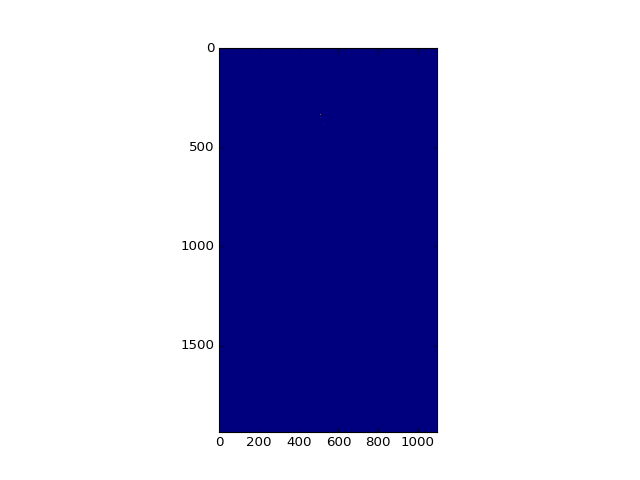

In [27]:
gap1.update()

In [56]:
gap0.run.counts_per_second()

1.6994482029910718

In [33]:
_ = gap2.run.plot_lineout(rebin=5)

In [46]:
counts_vs_theta((gap3,gap2,gap0,gap1))

# Didn't get as good of counts as before.  Tried stepping forward in x, to see if maybe that helps

gap4: time 8:20pm

In [48]:
gap4 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.21.gap4')
gap4.run.theta=315

Stepped the other way instead

timestamp: 8:21pm

In [61]:
gap5 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.21.gap5')
gap5.run.theta=315

move one more the other way (x+)

In [68]:
gap6 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.21.gap6')
gap6.run.theta=315

Move again

In [75]:
gap7 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.21.gap7')
gap7.run.theta=315

same x-pos as gap7, now diff angle

In [93]:
gap8 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.21.gap8')
gap8.run.theta=310

# Maybe we aren't at the same z

step 1mm up in z

In [9]:
gap9 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.21.gap9')
gap9.run.theta=310

Loaded from cache.


In [12]:
gap9.run.counts_per_second()

1.856013881564452

# Figured out Izero was down by factor 4x, trying different energy

In [3]:
gap10 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.21.gap10')
gap10.run.theta=315

# Hmm maybe didn't change, now we'll try optimizing angle again

In [16]:
gap11 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.21.gap11')
gap11.run.theta=320

shoot and a miss, try another angle

In [26]:
gap12 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.21.gap12')
gap12.run.theta=330

oops wrong angle

In [44]:
gap13 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.21.gap13')
gap13.run.theta=310

try another angle

In [59]:
gap14 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.21.gap14')
gap14.run.theta=305

In [75]:
gap15 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.21.gap15')
gap15.run.theta=300

In [33]:
gap12.run.acquisition_time()

21.097860097885132

In [93]:
gap15.stop()

In [24]:
gap11.run.counts_per_second()

0.044745058331048145

In [127]:
[x.run.counts_per_second() for x in (gap10,gap11,gap12,gap13,gap14,gap15)]

[1.5683808954140521,
 0.044745058331048145,
 0.0,
 2.6251560525076334,
 3.7240582251668699,
 3.0994883397739548]

In [69]:
gap12.run.plot_lineout()

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

# Trying for LiFePO4

In [5]:
lifepo40 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.21.lifepo40')
lifepo40.run.theta=210

Loaded from cache.


In [6]:
lifepo41 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.21.lifepo41')
lifepo41.run.theta=205

Loaded from cache.


In [121]:
lifepo42 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.21.lifepo42')
lifepo42.run.theta=215

In [4]:
lifepo43 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.21.lifepo43')
lifepo43.run.theta=220

In [14]:
lifepo44 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.21.lifepo44')
lifepo44.run.theta=212.5

move x+ 0.1

In [23]:
lifepo45 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.21.lifepo45')
lifepo45.run.theta=212.5

In [34]:
lifepo46 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.21.lifepo46')
lifepo46.run.theta=212.5

In [51]:
lifepo47 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.21.lifepo47')
lifepo47.run.theta=212.5

In [67]:
lifepo48 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.21.lifepo48')
lifepo48.run.theta=212.5

In [73]:
lifepo49 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.21.lifepo49')
lifepo49.run.theta=212.5

In [88]:
lifepo410 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.21.lifepo410')
lifepo410.run.theta=212.5

In [94]:
lifepo410.run.counts_per_second()

3.1671534825074472

In [86]:
[x.run.counts_per_second() for x in (lifepo40,lifepo41,lifepo43,lifepo44,lifepo45,lifepo46,lifepo47,lifepo48,lifepo49)]

[2.6814271379509087,
 1.7572880372322826,
 0.061986334235389746,
 2.9686225224712595,
 0.80856950495752733,
 89.105290651767561,
 2.7405649542111892,
 3.049761767373909,
 2.5795666800885693]

In [95]:
lifepo410.stop()

# Okay let's take some data

White line, at 2152.9 eV

In [16]:
lifeporunset0 = camcontrol.RunSet(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            prefix = '9.21.lifeporunset0',htime="5m",number_runs=24)

Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.


In [11]:
darkrun0 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.21.darkrun0')

Loaded from cache.


dark run with window wide open:

In [12]:
darkrun1 = Monitor(threshold = 2, window_min = 5, window_max = 300, photon_value = 110,
            run_prefix = '9.21.darkrun1')

Loaded from cache.


In [9]:
darkrun1.run.acquisition_time()

84.6812813282013

In [10]:
darkrun1.stop()

In [15]:
darkrun1.run.plot_lineout()

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

<IPython.core.display.Javascript object>


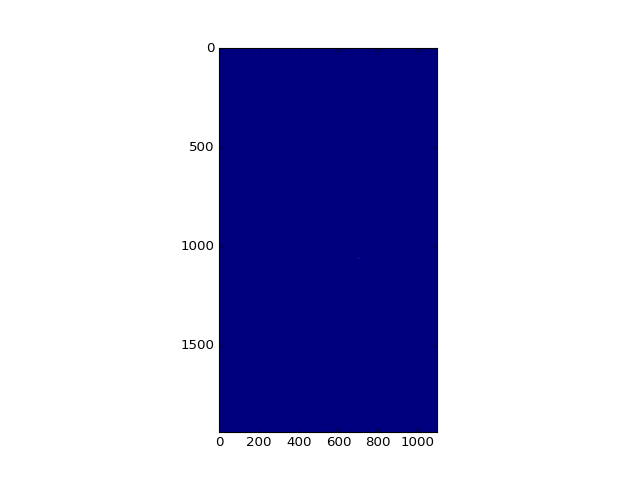

In [5]:
darkrun1.update()

In [17]:
lifeporunset1 = camcontrol.RunSet(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            prefix = '9.21.lifeporunset1',htime="5m",number_runs=24)

Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.


In [16]:
len([x.counts_per_second() for x in lifeporunset1.dataruns])

15

# LiFePO4 Runset0

In [18]:
[x.counts_per_second() for x in lifeporunset0.dataruns]

[2.4793718740258499,
 2.4490743560877424,
 2.7376252509719139,
 2.6800871366296888,
 2.3024417204267125,
 2.4378888324294103,
 2.6669740744425541,
 2.084617183911289,
 2.4524760511111574,
 2.1983609909589514,
 2.7224219802764722,
 2.6000122990171133,
 2.2549993326208351,
 2.6569796155876735,
 2.1992149230625082,
 2.5849447913189096,
 2.5080221116124686,
 2.5775726604310285,
 2.6050855564900237,
 2.0383029837082036,
 2.3736630581869291,
 2.3914785757187293,
 2.6069362683696982,
 2.4828240838906144]

In [19]:
plt.plot([x.counts_per_second() for x in lifeporunset0.dataruns])
plt.show()

In [252]:
[x.acquisition_time() for x in lifeporunset0.dataruns]

[300.05400252342224,
 300.1245229244232,
 300.17057490348816,
 300.1428871154785,
 300.1043288707733,
 300.2448785305023,
 300.15630769729614,
 300.18155908584595,
 300.21236538887024,
 300.20712661743164,
 300.15719509124756,
 300.12795090675354,
 300.2016611099243,
 300.25207257270813,
 300.2063031196594,
 300.1435651779175,
 300.2583358287811,
 300.1590721607208,
 300.2483835220337,
 300.1784083843231,
 300.2034411430359,
 300.13763642311096,
 300.13287329673767,
 300.1603937149048]

In [20]:
datarr=_reorient_array(np.sum([x.get_array() for x in lifeporunset0.dataruns],axis=0))

<IPython.core.display.Javascript object>


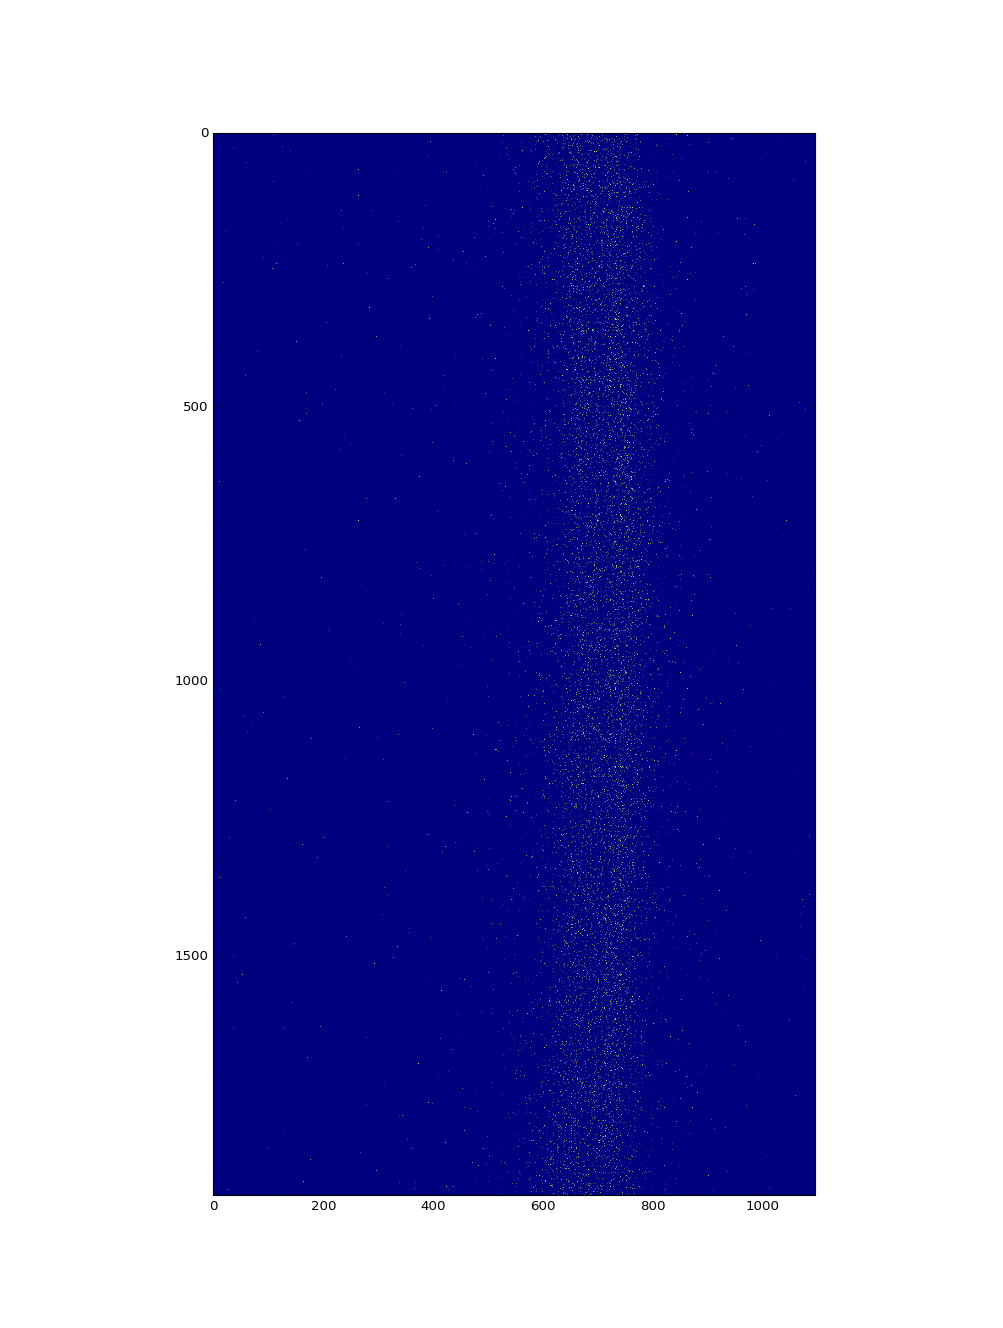

In [13]:
plt.imshow(datarr,vmax=200)
plt.show()

In [14]:
plot_with_energy_scale_arr2d(datarr,2015,label="LiFePO4",parabolic=True,rebin=6,yrange=[0,-1],show=False,calcfwhm=False,peaknormalize=False)
plt.show()

In [222]:
dat0=_reorient_array(np.sum([lifeporunset0.dataruns[i].get_array() for i in range(0,10)],axis=0))

In [239]:
plot_with_energy_scale_arr2d(
    _reorient_array(np.sum([lifeporunset0.dataruns[i].get_array() for i in range(0,10)],axis=0))
    ,2015,label="LiFePO4",parabolic=True,rebin=5,yrange=[0,-1],show=False,calcfwhm=False,peaknormalize=True)
plot_with_energy_scale_arr2d(
    _reorient_array(np.sum([lifeporunset0.dataruns[i].get_array() for i in range(10,20)],axis=0))
    ,2015,label="LiFePO4",parabolic=True,rebin=5,yrange=[0,-1],show=False,calcfwhm=False,peaknormalize=True)
plt.show()

In [16]:
cmplot(datarr,smooth=20)

In [18]:
cropping_tool_arr2d(datarr,500,calcfwhm=False,rebin=5,peaknormalize=True)

# LiFePO4 Runset1

In [32]:
np.mean([x.counts_per_second() for x in lifeporunset0.dataruns])

2.4621406546369364

In [26]:
np.mean([lifeporunset1.dataruns[i].counts_per_second() for i in range(14)])

2.3782177130230764

In [21]:
[x.acquisition_time() for x in lifeporunset1.dataruns]

[300.19434690475464,
 300.1947078704834,
 300.1588099002838,
 300.1846692562103,
 300.10938024520874,
 300.177729845047,
 300.1642527580261,
 300.11798572540283,
 300.19532346725464,
 300.1985447406769,
 300.19363260269165,
 300.25153040885925,
 300.233229637146,
 300.2217855453491,
 300.6612935066223,
 300.2094717025757,
 300.2370676994324,
 300.24241065979004,
 300.2618532180786,
 300.25168108940125,
 300.24227261543274,
 300.235559463501,
 300.2612724304199,
 300.11408257484436]

In [22]:
runset0=_reorient_array(np.sum([x.get_array() for x in lifeporunset0.dataruns],axis=0))

In [23]:
runset1=_reorient_array(np.sum([lifeporunset1.dataruns[i].get_array() for i in range(14)],axis=0))

In [24]:
totalrunset=runset0+runset1

In [25]:
plot_with_energy_scale_arr2d(totalrunset,2015,label="LiFePO4",parabolic=True,rebin=5,yrange=[0,-1],show=False,calcfwhm=False,peaknormalize=False)
plot_with_energy_scale_arr2d(runset0,2015,label="LiFePO4",parabolic=False,rebin=5,yrange=[0,-1],show=False,calcfwhm=False,peaknormalize=False)
plot_with_energy_scale_arr2d(runset1,2015,label="LiFePO4",parabolic=False,rebin=5,yrange=[0,-1],show=False,calcfwhm=False,peaknormalize=False)
plt.show()

<IPython.core.display.Javascript object>


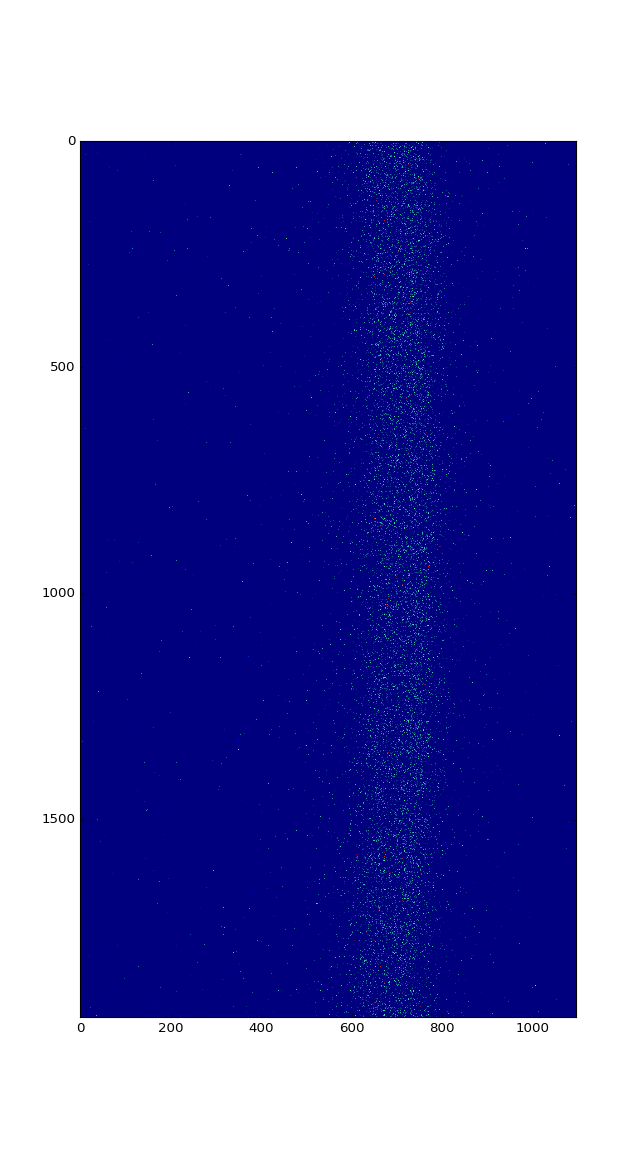

In [71]:
plt.imshow(totalrunset,vmax=250)
plt.show()

# Yifan, we're currently running just below here

# Adjusting beam energy to 2151.5eV

In [27]:
lifepoPreEdge = camcontrol.RunSet(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            prefix = '9.21.lifepoPreEdge',htime="10m",number_runs=60)

Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from 

* Yifan, you can run the cell below with shift+enter to get the count rates.  If there are any anomalies, feel free to call us.

In [14]:
len([x.counts_per_second() for x in lifepoPreEdge.dataruns])

52

In [29]:
[lifepoPreEdge.dataruns[i].counts_per_second() for i in range(44)]

[1.1428173985825461,
 1.3155219784989818,
 1.4755556465033268,
 1.2532010878643793,
 1.3898593311807994,
 1.4180181779139314,
 1.2949101816712854,
 1.3504042869317607,
 1.2560021466755455,
 1.505090425317307,
 1.3945806049379901,
 1.5178178879483017,
 1.2696239940885001,
 1.3598381001080642,
 1.5238968186653294,
 1.3025744096852967,
 1.3904477305497396,
 1.4673121147095813,
 1.3207866295797801,
 1.1941474354589496,
 1.3505451199466683,
 1.4711945996864098,
 1.3303677979952111,
 1.3872746628776074,
 1.3404738251020643,
 1.3974819142419561,
 1.4339371992545744,
 1.5021291303952258,
 1.4556677932134365,
 1.4599540959896786,
 1.6166311777718907,
 1.5571989977721838,
 1.4841280103434857,
 1.493950972174199,
 1.5660821634223523,
 1.3612962378015332,
 1.5880928206884821,
 1.3929624790125601,
 1.5032568718622095,
 1.3473397974355774,
 1.464834755576607,
 1.7062619574362174,
 1.562945435222663,
 1.2838106974039003]

In [30]:
np.mean([lifepoPreEdge.dataruns[i].counts_per_second() for i in range(44)])

1.4136414749885928

* Yifan, check the acquisition times with the cell below. If all the times are 600sec, the camera is done collecting.  We set it to run for 10 hours, so we'll likely be back before it finishes.

In [67]:
[x.acquisition_time() for x in lifepoPreEdge.dataruns]

[600.1038239002228,
 600.1212751865387,
 600.199168920517,
 600.1140947341919,
 600.1980850696564,
 600.1718163490295,
 600.2311708927155,
 600.1838982105255,
 600.1726858615875,
 600.2538774013519,
 600.2260704040527,
 600.1438632011414,
 600.2134947776794,
 600.1850848197937,
 600.130108833313,
 600.1681213378906,
 600.1467792987823,
 600.1263933181763,
 600.2139389514923,
 601.6159818172455,
 601.0906174182892,
 600.1678068637848,
 600.2304580211639,
 600.1171181201935,
 600.1066620349884,
 600.1769003868103,
 600.1847732067108,
 600.1602416038513,
 600.2181169986725,
 600.2243511676788,
 600.1200153827667,
 600.226900100708,
 600.2238922119141,
 600.1535637378693,
 600.1658871173859,
 600.2100157737732,
 600.0965929031372,
 600.074898481369,
 600.1696102619171,
 600.1320674419403,
 600.1731882095337,
 600.2062499523163,
 600.2012591362,
 600.1805276870728,
 600.1926922798157,
 600.2112865447998,
 600.1941428184509,
 600.266520023346,
 600.2743446826935,
 600.2539792060852,
 217.881

#### If you run the two cells below in order, the lineout will update

In [17]:
preEdgerunset=_reorient_array(np.sum([lifepoPreEdge.dataruns[i].get_array() for i in range(44)],axis=0))

In [20]:
plot_with_energy_scale_arr2d(totalrunset,2015,known_bin=736,label="LiFePO4",parabolic=True,rebin=5,yrange=[0,-1],show=False,calcfwhm=False,peaknormalize=False)
plot_with_energy_scale_arr2d(preEdgerunset,2015,known_bin=736,label="LiFePO4 - preEdge",parabolic=True,rebin=5,yrange=[0,-1],show=False,calcfwhm=False,peaknormalize=False)
plt.show()

<IPython.core.display.Javascript object>


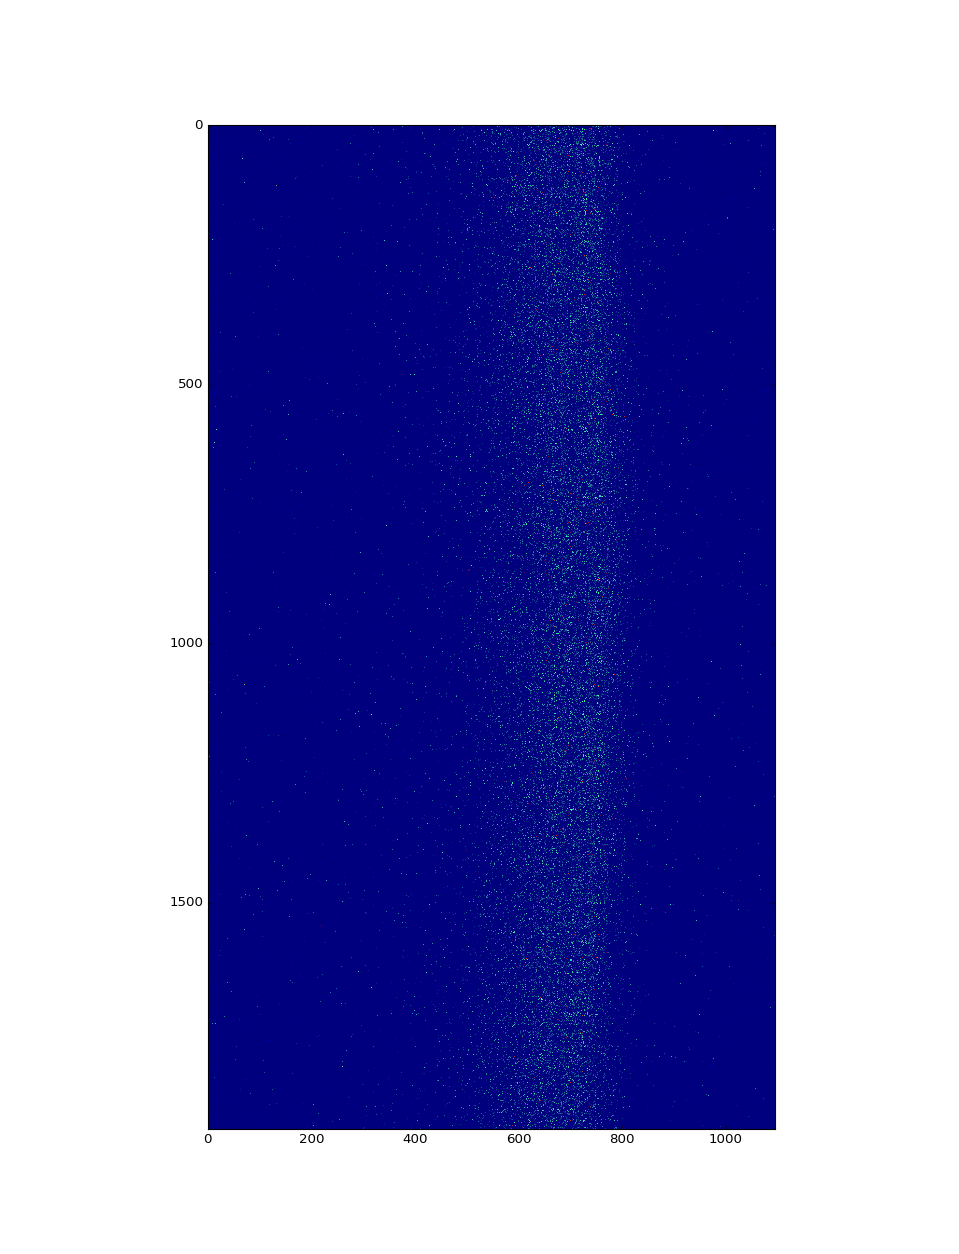

In [74]:
plt.imshow(preEdgerunset,vmax=250)
plt.show()

# Lost Helium 1 hr ago, let's try to reduce Helium flow and see if we can maintain count rate

In [3]:
heCheckRunset = camcontrol.RunSet(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            prefix = '9.21.heCheckRunset',htime="3m",number_runs=20)

starting acquisition


count rate was 1.5 counts/sec while the beam was on, same as before

In [6]:
[x.counts_per_second() for x in heCheckRunset.dataruns]

[1.1174720884886016, 0.0]

stopped acquisistion
starting acquisition


Beam off for a bit while Alex works on Izero

He flow knob at 0.5

In [3]:
heCheckRunset2 = camcontrol.RunSet(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            prefix = '9.21.heCheckRunset2',htime="1m",number_runs=3)

starting acquisition


In [14]:
[x.counts_per_second() for x in heCheckRunset2.dataruns]

[1.1889177756915534, 1.1510004301272299, 0.98935327657436312]

Changed He flow knob to 0.25

In [15]:
heCheckRunset3 = camcontrol.RunSet(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            prefix = '9.21.heCheckRunset3',htime="1m",number_runs=3)

starting acquisition


In [24]:
[x.counts_per_second() for x in heCheckRunset3.dataruns]

[1.2193163045218525, 1.0739128019186075, 1.1202924254923305]

Keep He flow knob at 0.25, slightly close lower exit valve on chamber to see if we can reduce leakage and maintain signal

In [25]:
heCheckRunset4 = camcontrol.RunSet(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            prefix = '9.21.heCheckRunset4',htime="1m",number_runs=3)

starting acquisition


In [27]:
[x.counts_per_second() for x in heCheckRunset4.dataruns]

[1.036640699872257, 1.2968016208275066, 1.13692694809578]

In [28]:
heCheckRunset5 = camcontrol.RunSet(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            prefix = '9.21.heCheckRunset5',htime="1m",number_runs=3)

starting acquisition


Reduce He flow know to .125

In [35]:
[x.counts_per_second() for x in heCheckRunset5.dataruns]

[0.93778550243658687, 0.82502624596676521, 0.90242255920244363]